In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from datetime import date, timedelta

# 🔁 Import your fetch functions
sys.path.append("/Users/tolgasabanoglu/Desktop/github/nightlight/pipelines")
from fetch_viirs import load_viirs, load_viirs_weekly



In [2]:
# 🔒 Auto-trust this notebook from within itself
import os
from nbformat import read, write, NO_CONVERT

notebook_path = "/Users/tolgasabanoglu/Desktop/github/nightlight/notebooks/viirs_inspect_gaza.ipynb"  # Adjust path if needed

if os.path.exists(notebook_path):
    with open(notebook_path, "r+", encoding="utf-8") as f:
        nb = read(f, as_version=4)
        for cell in nb.cells:
            cell.metadata["trusted"] = True
        f.seek(0)
        write(nb, f)
        f.truncate()
    print("✅ Notebook successfully marked as trusted.")
else:
    print(f"[❌] Notebook not found: {notebook_path}")


✅ Notebook successfully marked as trusted.


In [10]:
from datetime import datetime
from fetch_viirs import (
    load_viirs,
    viirs_to_dataframe,
    plot_viirs
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
CITY = "Gaza Strip"
YEAR = 2025
MONTH = 12
WEEKS = 4  # number of weeks to load


In [11]:
from dateutil.relativedelta import relativedelta
import datetime

def get_month_sequence(end_year, end_month, n_months):
    end_date = datetime.date(end_year, end_month, 1)
    months = []
    for i in range(n_months):
        d = end_date - relativedelta(months=i)
        months.append((d.year, d.month))
    return list(reversed(months))

month_seq = get_month_sequence(END_YEAR, END_MONTH, NUM_MONTHS)
print(month_seq)


[(2024, 7), (2024, 8), (2024, 9), (2024, 10), (2024, 11), (2024, 12), (2025, 1), (2025, 2), (2025, 3), (2025, 4), (2025, 5), (2025, 6)]


In [5]:
images = []
dfs = []

for y, m in month_seq:
    img, meta = load_viirs(CITY, y, m)
    if img is not None:
        label = f"{y}-{str(m).zfill(2)}"
        images.append((label, img))
        df = viirs_to_dataframe(img, meta, CITY, label)
        dfs.append(df)
    else:
        print(f"[⚠️] Skipped: {y}-{m}")


[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-07
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-08
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-09
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-10
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-11
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2024-12
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2025-01
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composite: 2025-02
[✅] Monthly VIIRS image loaded.
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[⬇️] Downloading monthly composi

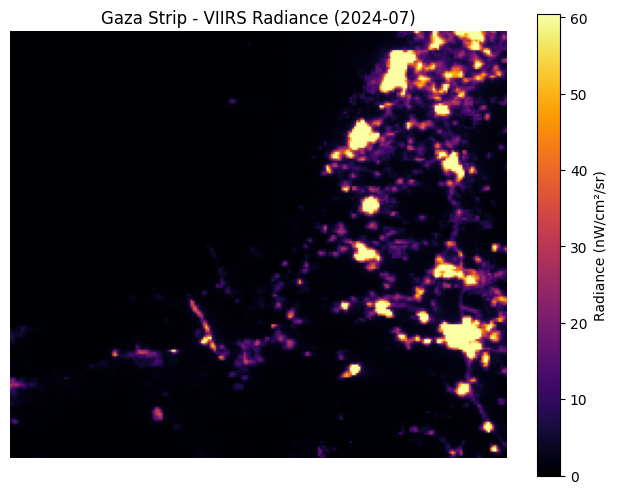

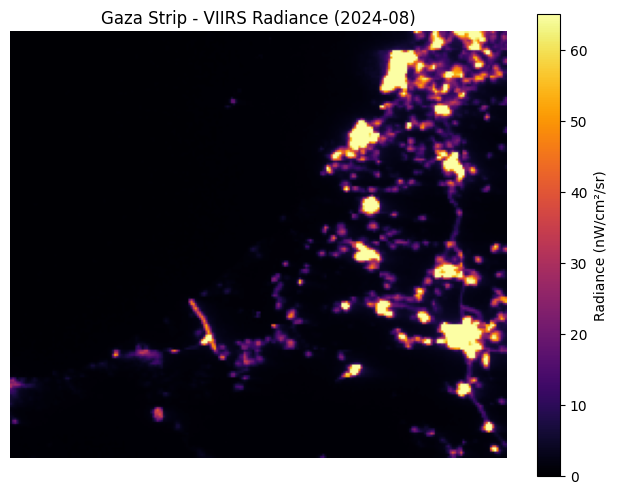

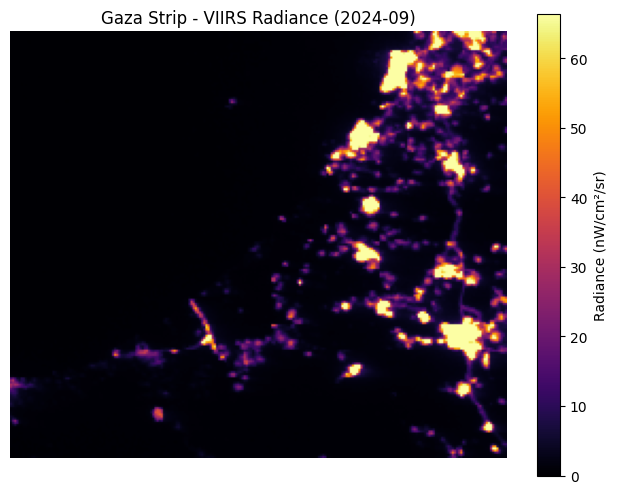

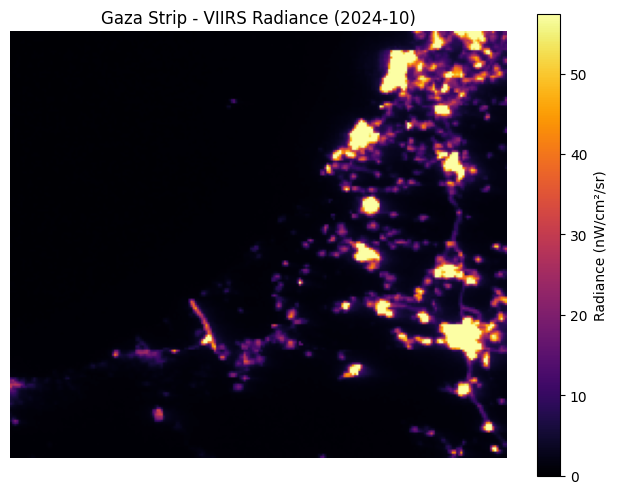

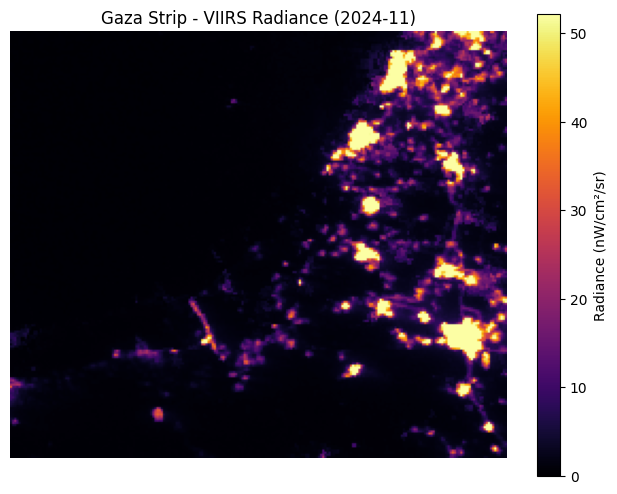

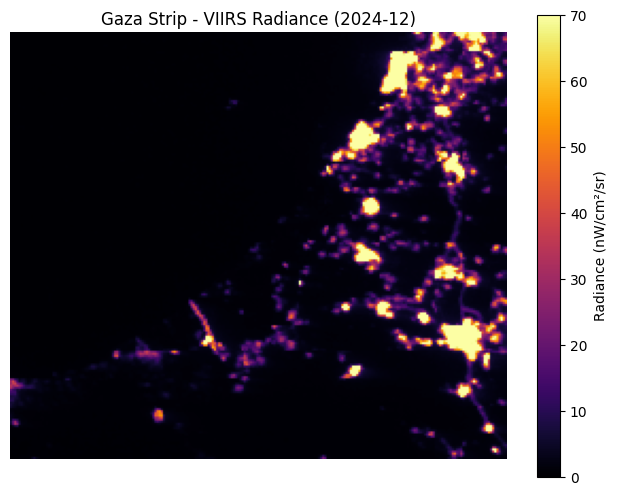

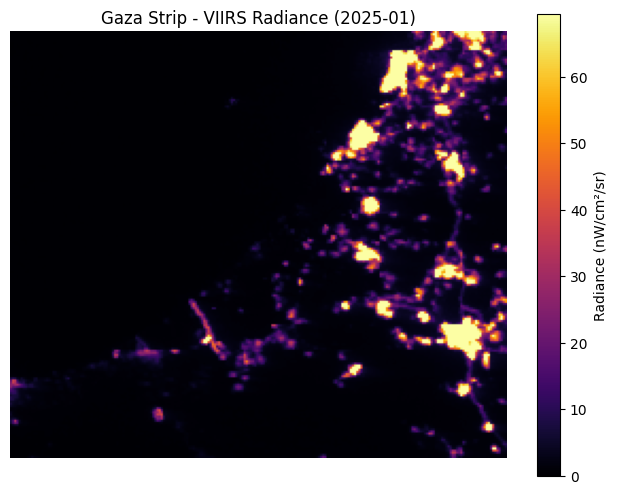

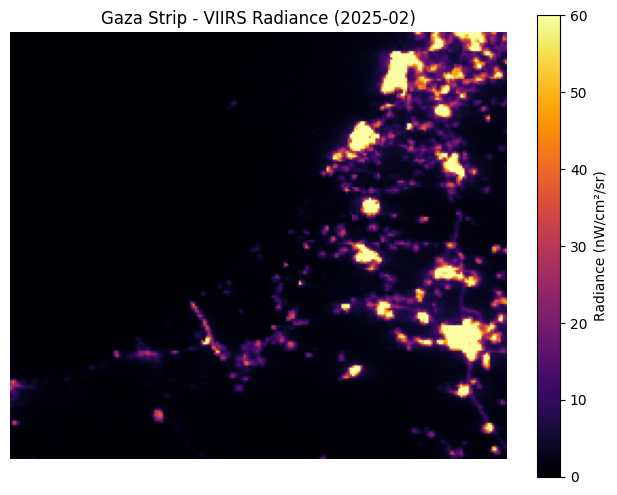

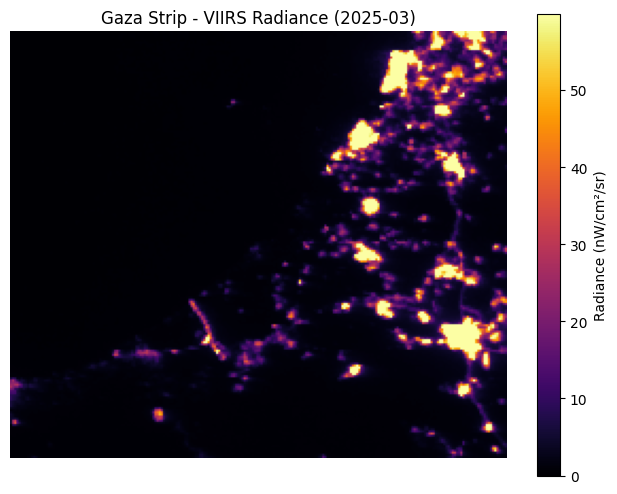

In [ ]:
for label, img in images:
    plot_viirs(img, f"{CITY} - VIIRS Radiance ({label})")

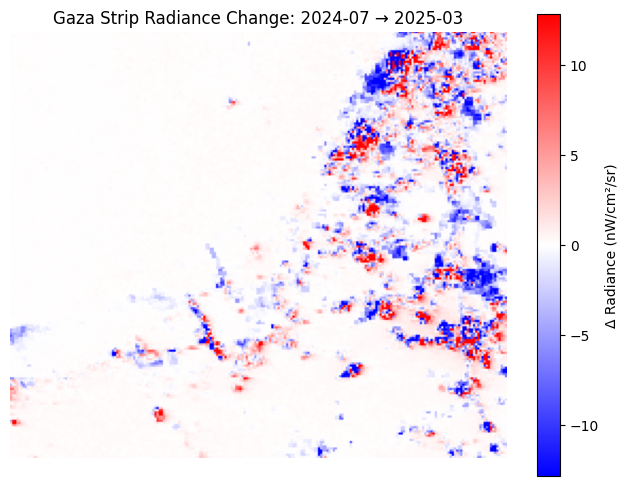

In [7]:
if len(images) >= 2:
    first_label, first_img = images[0]
    last_label, last_img = images[-1]

    diff_img = last_img - first_img

    plt.figure(figsize=(8, 6))
    vmax = np.nanpercentile(np.abs(diff_img), 98)
    plt.imshow(diff_img, cmap="bwr", vmin=-vmax, vmax=vmax)
    plt.title(f"{CITY} Radiance Change: {first_label} → {last_label}")
    plt.colorbar(label="Δ Radiance (nW/cm²/sr)")
    plt.axis("off")
    plt.show()
else:
    print("[❌] Not enough monthly data to compute a difference.")


In [19]:
from datetime import date, timedelta

CITY = "Gaza Strip"
END_YEAR = 2025
END_MONTH = 7
NUM_MONTHS = 6  # e.g., last 3 months

# Generate (year, month) pairs
month_seq = get_month_sequence(END_YEAR, END_MONTH, NUM_MONTHS)

# Collect weekly data
weekly_dfs = []

for y, m in month_seq:
    for week_num in range(1, 5):  # Approx. 4 weeks per month
        try:
            img, meta = load_viirs_weekly(CITY, y, m, week_num)
            if img is not None:
                # Calculate actual date range
                start_date = date(y, m, 1) + timedelta(days=(week_num - 1) * 7)
                df = viirs_to_dataframe(img, meta, CITY, start_date.strftime("%Y-%m-%d"))
                weekly_dfs.append(df)
            else:
                print(f"[⚠️] Skipped {y}-{m}, week {week_num}")
        except Exception as e:
            print(f"[❌] Error for {y}-{m}, week {week_num}: {e}")


[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-02-01 → 2025-02-07
[⚠️] No weekly VIIRS data for Gaza Strip 2025-02-01 → 2025-02-07
[⚠️] Skipped 2025-2, week 1
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-02-08 → 2025-02-14
[⚠️] No weekly VIIRS data for Gaza Strip 2025-02-08 → 2025-02-14
[⚠️] Skipped 2025-2, week 2
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-02-15 → 2025-02-21
[⚠️] No weekly VIIRS data for Gaza Strip 2025-02-15 → 2025-02-21
[⚠️] Skipped 2025-2, week 3
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-02-22 → 2025-02-28
[⚠️] No weekly VIIRS data for Gaza Strip 2025-02-22 → 2025-02-28
[⚠️] Skipped 2025-2, week 4
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-03-01 → 2025-03-07
[⚠️] No weekly VIIRS data for Gaza Strip 2025-03-01 → 2025-03-07
[⚠️] Skipped 2025-3, week 1
[📍] Gaza Strip → lat: 31.44, lon: 34.36
[📆] Weekly range: 2025-03-08 → 2025-03-14
[⚠️] No weekly VIIRS data for Gaza Strip 20

In [22]:
df

,longitude,latitude,radiance,city,date
0,34.677216,31.892438,4.05,Gaza Strip,2024-07-22
1,34.681707,31.892438,12.40,Gaza Strip,2024-07-22
2,34.686199,31.892438,8.40,Gaza Strip,2024-07-22
3,34.690690,31.892438,45.80,Gaza Strip,2024-07-22
4,34.695182,31.892438,90.30,Gaza Strip,2024-07-22
...,...,...,...,...,...
16822,34.825438,30.994123,1.80,Gaza Strip,2024-07-22
16823,34.852387,30.994123,2.40,Gaza Strip,2024-07-22
16824,34.856879,30.994123,3.00,Gaza Strip,2024-07-22
16825,34.874845,30.994123,1.70,Gaza Strip,2024-07-22
